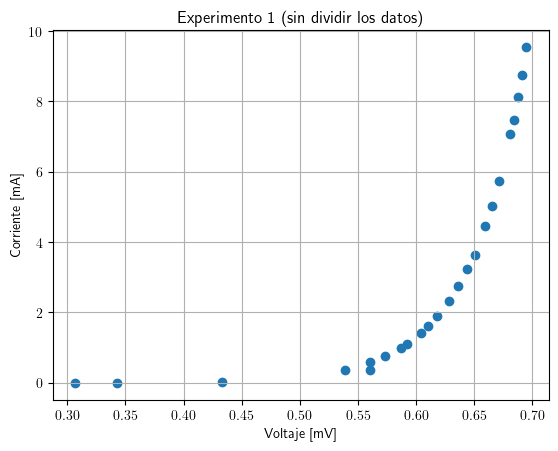

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True


exp1 = pd.read_excel("Experimento1.xlsx")
exp1.columns = ["Voltaje", "Corriente"]

plt.scatter(exp1.Voltaje, exp1.Corriente)
plt.xlabel("Voltaje [mV]"); plt.ylabel("Corriente [mA]"); plt.title("Experimento 1 (sin dividir los datos)"); plt.grid()

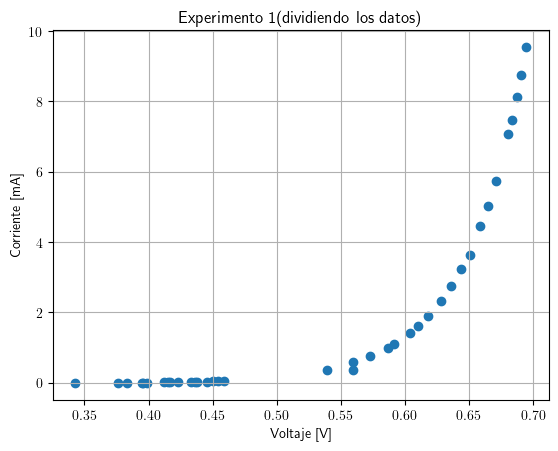

In [147]:
region_shockley = exp1[exp1.Corriente>0.001]
plt.scatter(region_shockley.Voltaje, region_shockley.Corriente)
plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]"); plt.title("Experimento 1(dividiendo los datos)"); plt.grid()

_________________________________________________________________________________________________________________________________________________________________________________

In [149]:
import statsmodels.api as sm
X =  sm.add_constant(region_shockley["Voltaje"])
Y =  np.log(region_shockley["Corriente"])
modelo = sm.OLS(Y,X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:              Corriente   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.063e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           4.26e-46
Time:                        23:24:13   Log-Likelihood:                 17.089
No. Observations:                  38   AIC:                            -30.18
Df Residuals:                      36   BIC:                            -26.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7909      0.123   -111.800      0.0

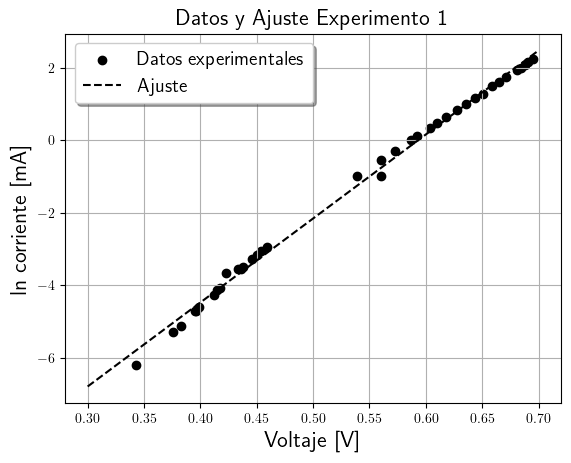

In [150]:
x = np.linspace(0.30,0.70,100)
plt.scatter( exp1["Voltaje"],np.log(exp1["Corriente"]), label = "Datos experimentales", c = "black")
plt.plot(x,   -13.7535+23.1956*x, c = "black" ,label = "Ajuste", linestyle = "--")
plt.grid(); plt.xlabel("Voltaje [V]",fontsize=16); plt.ylabel("ln corriente [mA]",fontsize=16); plt.title("Datos y Ajuste  Experimento 1",fontsize=16)
plt.legend(shadow=True,fontsize=14)

In [151]:
import math
I_0 = math.exp(-13.7535)
beta = 23.1956
Shockley =  lambda data: I_0*np.exp(beta*data) 

v = np.linspace(0.30, 0.70, 100)

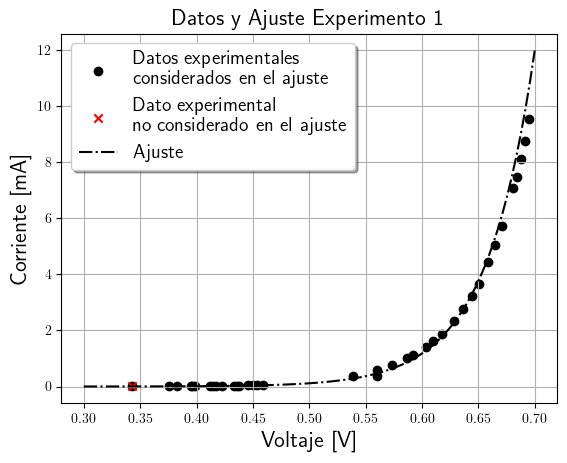

In [152]:
plt.scatter(region_shockley["Voltaje"], region_shockley["Corriente"], marker="o", c="black",label = "Datos experimentales \n considerados en el ajuste")
plt.scatter(exp1["Voltaje"][0],exp1["Corriente"][0] ,  marker="x", c="red",label = "Dato experimental \n no considerado  en el ajuste")
plt.plot(v, Shockley(v), c = "black" ,label = "Ajuste", linestyle = "-.")
plt.grid(); plt.xlabel("Voltaje [V]",fontsize=16); plt.ylabel("Corriente [mA]",fontsize=16); plt.title("Datos y Ajuste Experimento 1",fontsize=16)
plt.legend(shadow=True,fontsize=14)

In [153]:
exp2 = pd.read_excel("Experimento2.xlsx")
exp2.Temperatura = exp2.Temperatura+273.15

In [154]:
nombre_archivo = 'ya.xlsx'
exp2.to_excel(nombre_archivo, index=False)

In [156]:
exp2

,Temperatura,Voltaje
0,294.15,0.700
1,297.15,0.695
2,300.15,0.688
3,303.15,0.685
4,306.15,0.680
5,309.15,0.674
6,312.15,0.670
7,315.15,0.664
8,318.15,0.659
9,321.15,0.654


In [155]:
z_x =  sm.add_constant(exp2["Temperatura"])
z_y =  exp2["Voltaje"]
modelo = sm.OLS(z_y,z_x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                Voltaje   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.817e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           8.87e-37
Time:                        23:24:23   Log-Likelihood:                 134.43
No. Observations:                  23   AIC:                            -264.9
Df Residuals:                      21   BIC:                            -262.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1954      0.003    474.823      

In [146]:
x = np.linspace(290,361,100)
plt.scatter( exp2["Temperatura"]-2,exp2["Voltaje"], label = "Datos experimentales", c = "black")
plt.plot(x,   1.1954-0.0017*x, c = "black" ,label = "Ajuste", linestyle = "--")
plt.grid(); plt.xlabel("Temperatura [K]",fontsize=16); plt.ylabel("Voltaje [V]",fontsize=16); plt.title("Datos y Ajuste Experimento 2",fontsize=16)
plt.legend(shadow=True,fontsize=14)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [2]:
from math import *
exp(-13.7535)

1.063973578063758e-06

____________________________________________________________________________________________________________________________________________________________________

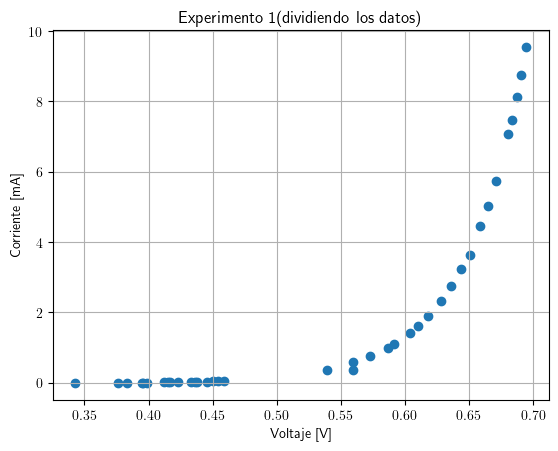

In [104]:
data = pd.read_excel("data.xlsx")
data.columns = ["Voltaje", "Corriente"]
region_shockley = data[data.Corriente>1]
plt.scatter(data.Voltaje, data.Corriente)
plt.xlabel("Voltaje [V]"); plt.ylabel("Corriente [mA]"); plt.title("Experimento 1(dividiendo los datos)"); plt.grid()


In [112]:
data_valida = data[data.Corriente > 1]
import statsmodels.api as sm
X =  sm.add_constant(data["Voltaje"])
Y =  np.log(data["Corriente"])
modelo = sm.OLS(Y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Corriente   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.063e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           4.26e-46
Time:                        16:42:13   Log-Likelihood:                 17.089
No. Observations:                  38   AIC:                            -30.18
Df Residuals:                      36   BIC:                            -26.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7909      0.123   -111.800      0.0

In [140]:
(1/((8.617333262e-5)*294.15))/23.196

1.7007683221898098

In [143]:
((8.617333262e-5)*294.15*1.7)*3

0.12927421752988227

In [144]:
1/0.12927421752988227

7.735494510100947

In [2]:
(-2.35+1.7)/2.35 *100

-27.65957446808511